In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#### Load the data you receive into a Pandas DataFrame

In [11]:
df = pd.read_csv("./googleplaystore.csv")


#### Show the first five rows of the data set

In [12]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Show the description and the info of the data set

In [13]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Visualize your dataset to demonstrate insights into the data

TypeError: Could not convert 159967875102156449671671783681513791121138808788448294326151855363227194216224399450654769961118192202602031362231120227503510153535648145366391585911171762952212206261745311070858453671598284170571295421047980512914033971534777438846243160902951904021135652530116986137927192073670211977373574994197136142151682155138541421777348250133727880361748066578631433509717542680128818900497901150173932090222543698572964420501041793460136187182301347411371535959315753826834119227722806541849773536418473306638712576229147241857447857755081408024631545406015544641822486203130143511650714332339046886036393496787873175061862208447303190801618584278319161546202133626875177827096451383425271322168027391065233757287885126930105156114341157161296747301254730851853258421773070991100286116589148945445862272894146353127918488073670001598723084718884111622959124034459641495569033161423055190232073721225380837106007435982280805228741621476023243989788080542492286897103755465051144210295159872296293137099151507180213832317558682111544841592081578662714930795800698916422108741316146241661977023086989521110587817215987229629313709915150718021383231755868211154484159208157866271493079580069891642289788080442492286897103755465051144210295217730100285951510413231751013635240055710622495168341010238970302438733914421819396514461208831425671151942255129839279564387133016777571151259952188142115519813596100659684895566428476911931612525796429951429035460432434192491133479915867930750284187998659395478589266602302093690151498541929489955943767413698247350920769368801710316354345487615381245108333053538733336481201366624237078181031282502083237541389467022939137612585564075117712922250212718769119316566465784785988122498113349733419433132014832395947285387446104841693128509245109317103128765007818102823833564635015434938434698224486310790289330761373201284286025465273689315880346980964304130751182264916541389247369342925515047125111303648480177148501310027156550981133501125781096518247190613125232832391133497372065275401049901777031752917726323746832254483565552441603084572839382532283152872057391487378202099498460448341881428842730521818337420901122595124346837842255414204470623707341951347859885947281133525510484169538744629208191032350154244863107902892546527154557004251680128572676646255677796163712632313724488453057083132017246041951163310212370536671320228671115721262622288820671643105341442194118061999225449768425191146130461726887229532593537785221219723520651641939277808254003510931354181601221257081241639867888535508424302857264884525567779837126326163753771163331372473830570895346312228881726851644953419528671212626143916451320485333713049516989231546149198135420225458723231701389057083537134401431059894619122121508180218352052439502365152157667014003974218725061829868661859352812518561103353842202776210140113002402305180612050000111414011040143101120240006495495425605931021210521421972865168126334160582183243318580353512579111053234788256915824531829861157976998628992418189325448537531429977697703234640751061193215606514286133136246936212390109026694834291874817264061161931682985567367005889574127572108529888192915162153014232545191107903853751818932118569902090481323812489122485552153012721455689785994118529980304358119042225122384990207340412733251835274361749557041927713612378621837265624027513791369223631769430756396331664210582277853751818936290507211856904819902022384323801725056949385991107884411857973266935569514263262905075525617250854798481575112336461107903314300206527934838164784716195206283923241835252582821185620005812397021086136949814855062905073847552568430948151725081107948266948142062065329348147004282840209378621405694981485498431121185620653217250825607920781610311213108535285456208116562894829677147008910939985095241225081029171653624885646141980697946618103078176823700017552818282843492368411646916407698702975324582354961166165300823063873844116838918501498213329629690130549613059163368242050264621867327326530082437472639151144550501497545620878131033244215254155234310066122163880899205888185493333871232792742460841297062881501480731969261201229981239835928644482237850149854565992968293100958818538808992058123279319691608412881501637258028333876120173686429706274241968352793593114807172478772318523182103197774867454567082967715808238808931006612327988185319691781360841653008274243338740771928815011503322997612018012970627424123983527935931223781480719777486748968303407719732185650725123279243747157562389941236666755438769160164377125666478717737824011370742153260892061181115558573378232308938744647316988009930456643200583946631610653134619531242981491001139952825017124424390415230636718426442780826076112656335738319062067295797313058231218167168344281524748445355181218536746219961383711207311163225070670630164959659741510392721525508604493817881069734783831804385619968444545133624625757493283123048188119194595734783812643121570134564283169611112547731592815703614886186622313069973131126587241770630210542516612930419870359616144075144610615141714424102605474344228084280916808157505246471922333410658574937836125941386813595211066818845962348613758028148568512644712930437801519259501599359057731659760146271098289870782112641009973478743290341090964879512507195104012472978306433131374549208463699814532395647843299782270712973761113661182473109784332061681038412107413803155944101592800843614455377139810329353240515108022513900425831685091931421314302247314541495212501726140655564925650711707107746539906619622207119627861881212912689135922015131569319862287517071902424839605112284641559441920228751032935401165151776903211343755104504280093332083521811640337517292969511420428156157738098311392723372201254005922009811792554802148276471036127057064656446238144040512273574171998275979116207150294708674114023215314709120291873516288027026755918677777864250114418611203299115721148101836622739310445494794848208123284691004062052996679118366939900954201301042515342895160096106547134195249855273967087101097563834319024782765111572175571707692107265401608190747976758628854822610262894511506128868261114501954323324311689775635499707692107482862665271269203019369156145203261295526813257384102402964559407570242187352312183862616128583435650679169435242992676232739670871075571117176704161567414402270294144050100406141163183669251534289511873520559262501144708753693958276532743924902409418539306122921020547340521778953260613241873520693952743924901260172409420547229214246930611853934052702943260621778951324187352369395143942654018121372410253464216570482262016128945038115063166520529913799111455111462576342332438576116897756370769417907316727386162243659132497760003771117529317435379927581437757384811005410117391893522714193685739123146531223013114287443543800428175084911602258440872496103305266910761912627322481080932801478238244505153538004465242766311120068964435368578481162243175293417907383427387714212258435381381208758301459232648767007539126862481465929783290743454411237258036313027211091130252073965805517037750612657261919601708318671312014591226393991023945222137811267189684749760114099551357135653936472871611431616810011607981589398542607260743829335726145343277457419418214510944665216753652189619412966322252316430319555778694212173686554332643478266761067179736750520304737649147691773448106739724378895736165820304330998752087829834802680812452360166371797959046808124523601663717979590531142203315332830139378942119520421321311803494641009728588196211054444275033833464447388277222642242667725425814889736920352341622313350881186091048530814973615980026105264066989377892161985631030644891723100041717039685981103931419829759206817322632952411135631556666912955572706872157930506275492081723005680571300490892358741287324205325772499049110216538761413076062898818292123381767124927723193444734610485334141986024489172322428456406698031978651351068541867598819081488951889250183846230710295305619888021579305465624598541534466231347751489122376724951137271506275261062299058610354811893749211221898565506776142711043452348251385093269834811250179882639556680574673538763927504101295606461137946926930544487911498648277240942242845613510893606301137267142003447672495523481060743348118937100041759228215350848118880104249252307273702342224498123212621182531415297022622510123025315763849114641694692671964825664277732582555380148177371565618410611016862754471747554578476145353149937353145837142701955582994023072741975216675231178516588854114411073102916818977333775210210730933584207924041632506707473588171540338957214777100609134386616871754972018996250949303312059218797248498120557353959017582918621199222111974121812510795130043820793943379134449882224297163883589142005502719142110719737162789315951659281480189246806330917680733844643421481952246658412632551902182125242045554745684416540166015901730574812245142624722430188444991014201891277253526199095104931489451351771188958223136735448938887614415406765129557659907104601048601881191511295625309393223084998833675235294319817610055521412966521585805065935419676990723592504218921138239988380619754074695556688926988821535973148924698923818767425211254382944565514549214515476569108357127725352150099942308868119154523529415359732698889990663767425221192181327265184210100326912428554014251097906251565795565633791314685917258975490391559650292164520962138182052551769619496932759938167991053854765691056203713914779134788334326321684935437375304343055806781533815593073251266492151039306764224301884067651599071500622142016042800981489901542642698511254385387781892384713272692304342145129562599079617144826106801300619212379321892607462710430355669081480182275064547644125647435521192352148788110401536349592504170441551861125566541967634494260651463816349214091468638344585761440723411048615470694421454449910147741275333983202675761116181294868597793693781143621504861538224936110997410879514551024101482286961732026919459843186161195042896828611716332336606328619102169974674153085470502359061775362944005206094323202942076496824714962026729436192301112623671965296262931917919199140141108771601036647644530792121372376404635616982445085586961102169974870115246520654407653090410675033785420758795323547031131114673203217817562585083484379415192456524877765100885255523762141363472584132919214829541273278392596430605140884186710148462306011208015489518954306052555262339847258466661104471574197191701696096188136929527319856107531542885234522332831100854560197631862377260072903361730633234276159587968559611123305669738438214248185219516153593802161906903131554964181160599171042733822533396380216190690313155496418116059917104273382253339644508901821734707135972913311710879547213955376666051838629439736028528745169609824714406239259679667207631574204123322293198126623398508876316013155287375307924557919720361970159619354384272321237656412960311355781296321617145717292115339219913611215206395791533577351214104845280101561785761682516332531913397434207121735872633492041625126411421466591581947373118275241028582094236330337882518674250626622537432657447615641020066099231608348783761853803183837073158741821189174669126453107107009141587550348819015268621000822772167216035994543187822184723889650734983052174745168652913885729211352118954275215929512921841554555212108736340817133197272485212153351381510901288430315451992834602161298039521417513168641688281129283363437171372063124107020093220062000000000250311230402042332100010280150000100145110001020209449687418537474410124201450321115730700163074433045324168653120359656910276302657312312231522612217623666725337861106665174717281292192316078158306665773138606259491732955326224921701478714034305441441189483112549191376260867061612007648027144522510333177547684571972556216404250879658374125907547516056222695220982313251322347990831363354093057146122533919583344921791298348844118937817703154413821204127253806669125984948682411570044231052058032858162955325138026893642531701470566577446148356388309872479909179551701535266577313430544151502106404958341637309125989411570031616101944612253671520959380666942313828582033249378177051504117579412598948524559000643677791298348869561338212120771217572220527913011758151259894486830852455106407637817709000646245574231385220183324979130141613621099859131294294608753389615916606441473278892397327090922615730548579233556385858106798882037186257144425510849451825242750365621674166228730834367290258816265538602251257831715842441415682731425121091241350431085921315242487323082341784976840660127194536218364158679189231871179899755289677939701315191819902137356211039428713159082102081370749792612847256707146153101883165999751179852896181990579202852324953372532102081370749337582847213420719311798278892352896227851213973597011558213735169661819905792062110391257834198644147318611613085315908591656928523285603417144588415810577390920427942833583942052102089552046153684061817982571914251227889233973551219701130852852344588942059552013707492788923460272596110425237513085591748535497387833583684064407162120813973563805123181823192329871610950021159132050424323981085855621974538953142634259450123029914804218415282578103498594028933624968033781052534926544191864744762218584018203116319854400333795611677315804712525956114157001652326361285788441058554709023303928578115905853421157928711688021730624211085853870189847159251951987166544185282558240475527247315793655427680702418135329160157928742677151736981169323440336864942079297071509835724718984865093106080449411292721110664955310859051701898471592519519871643296130081462152140917888604921135125415750618714161168802404754209733475363584678140241813524437112865215343612097733686467531154865107495531632085264914944915272488197743343935125547783118714213337952126337680712404753736061542671434014510001490732216328211632321146807517662418158914917315815175945591028637167652811714107527775298653368705157934393726597068823109486513249553197295215783074533289698717542561315815146270252113818022836628288245979513382591199517333429093190856270107724101455152780217334103842779029103111272576346639381867839878152867635801210031357631764481981160169992364901222822184011251721412324871809389502324231664139124861888346975510454991031610627790052113845979512228217644813382591031288809436115211388288291031784422888093017308403625575219230926261023716720207987543184513098190461061108533871115129673277904500176365017645050179436115211409971122283166036153052408213383391033990323861015211401222838288313383391033353943238628880928895410395115492779045211403412345979740575517427253999711222838288334291266652183876513383329431083187543186799103332386689358090028880955117554528895501791115130840160526713662621984852029491905150647132163884815456012260121183038817878268711162837359403923515521984833782192641233865575155124781328621610176779212968998585136633459851557216815227745562285116283825621443275070811788242180043935171889251037157502756048154615093292876883326665132754893043054183038715680169805112304471652996205345998721256425283442735560397422116283711182167344893030447136626100352031325740247814254669252428152028180392756022748216388169804778077053325648154614544134895480822419179156177610323489301609219848136626304032163883325648154618622825826013318303885757317878116283735956017202263525141148907153481546575739235373149723676212037340225428499971596018294212970738655803349357450931823924199373331275966330833216407702886076604261897393294583825592341262394330468113687412367790693537554315585142122151272239602241514548328250185911574819185136614552870551703012804232509435731516399754315912414201184395997332111114788704044295808768662077064254879111507472904115409166367618918192661542076057113357991485066799121526927731148211123888538733509342336908311271885659163958072426516575764548867556848190961116393154578406763983327328313948080105418591096559711073204594198944273351153392610287941342031569348979410303637121059594964285812255443090727474439411377533674524549341301375621729906830911218057146646664149657172413925832794102923670277675832421550731563311415452948514239371688114851622092024745121022983215783441473935552522672664016495686342541312371354724439603277209229662610796273994292031891820564406645339812089282864666418934249590586743304989789025037586176230137237159159512010013029470163624112977580521218011845911247969417733838157495864814849817772464666412390185330743577129024169488104012880611343667302580711218052664025121062516168730018139988140704624924511456478442591941743511577312008208412653692630162971188154273117182262287943252896226456107949111200965358675103830628725048064327800691474213153839852655913500855018613102308969498582088159811024515640311507219302148839665725770591092367618798209696149839315368123412185632808472764964414185499732126011179552537074146176873404617102701559995671311725569147429884372513148839620519173695144879538397149794609182979530152777946752317415208412527312113016305226456496399107961681597454990061879615081374806408582272445672401017570331232112242421507805813720410643226295579046914744046101488397298854155999480638515789851634930291259851027060840133573233931980511025948582308011926919273121126718910383036850186130918669164201614971432282460861794176361434311413393637896710755949763248449293623861621002994983433690731631904647176375051150169271534937806603198246668194034102533465343247970318215283976795155843715945520534048929819951111817893411297153701819440606133338369001312037418410099420008134261877326941745713533776231422858214042143189313898683096173478243492215417493159662332293446777263418425256553057557590891551127645480725900312191640039301032076239242193381762419738259605186999881953006436921351168161559690638434845639504823259225555921868644915874209326421268936969457447146651192026474426668501154928835132051261121564746721596221699653863024991915819642624264112967812970630693835586066293080542563559213788219088894819895481071119081850586972129788776355168417511011667403357944735254318818302873150413950211474149020904427470062959401675680712840174332103824139996697866384177033212135074425877635131028128401784957331123158138049259185884409752710424799263647610530722296781565242479013169616922499193684189766302062740492597667729308078154479594201737116674032333058036823292296781247902499192364136841321718976492596302040975172402930802566806246563647201737877643103074131028128401872326291568153481104800504594326956443492842014218843652126282141101871022063286454159226522976810224841225162049260145356210562215893682290937937158656392038375166573014132060516094655903222544348232791257270556124056471693910218617477168818857118386083817000166162335886418372099512398213340180539894989104831413815614102477305565856263454172855739480131114885236545399717486421092337425743576301454827711703122189615265814766185238435334267208930536910967296072617034795741684104212846650991798763694698518389714685450867920787107798522676013118413609101346511172129085253057651546689832427931476982562354813319512952931706914508846253207874411174151524049275292658576349187762440695137198781282082219156374515276983310611249551299680023494219446611418491015950799206230398897130505015530421421029162583448718212668294817712922836071542828489100531868152802481947224728325341230448814472312528022248299783494624139794428902241945527275964211215318737340490111012188855723874291652668680964996082470737610943275177892145113045241154595513202730649836100213820645962619717773053474082921736105102148625091448258873020832374229977811614264097430586874972230951159112914026186084410138677627067657490258626191171107624340648689873470153011015841477181168959400043323682338449214265187892740154432788460521081949106377353787951506783307509610657736824135440825647599514131657173508141511488289152092715632495184300936148536181983162574660147675951858424604324103749231613591105521053460035906200739940056642847859596414290388944351302455112726321354839435721411657972258811176079433731250107900926593951309638167165816495436203685427765930581830555904175983851127482837236971744830407185526211288056488480216238572152065341946412683365610341205998934426704253411677154710510965438927289417772552541523151703330184614858069929019604191729544178661816401231451981691340314650615439381030641721441081266591462132502467163356510768117610426414017520170178723245419758478589231335947207453463552315538137137201330324039111175188249308104841693777822298642502578347413201580987295237896118421000989158900828387518380903073984637439217616254764474562597058057212270518533961264132900840582487972368174728628609170716498934424511362909140160317601656808101740811851243241440461955106519047164390194444641839287127372125465492552351601904239159641126343043517369264703456866269496997225669601945224357049576210230891662631111915674103065677296515527611535552542511185148904152852173485222308556659499182721223753369538943153823637234588207587805965492148412021841983033071890138646917940027571266167229280320214255915537102189234606128100352538156862636801972747193259755216603325396013318041362081736931337789357048929899474663063074621338600923292295051061696187659396546568020515516841314751488265150801247379535416991139340153092573645671427461403044322401324148321140205959826180697589145428268298041759009938290423020268695613535051129135108002082135216120531473062845131162116169720613245021216418210189143148666276912630314383246802466813788313403268935914110219420124143215665713342641142110736424959716979396020217460159757357444340794454839253691351852636711541725956820169605136140481776872351068144902925165525516962177751461124416771865142245178476281243597257446490015097901469132250315035445785560334161111429538862789775174827213304748263069115312861180816386063044751820100674802300531447820775227753704150296321592103138129185226454179881771846548146124219431468131108819812975682105710490166006761166012335881668869363836487654921866839775731248521394387843316553433157111782158262452105688371219824517468559952241443511404102499061011889457550920933971471092631926772411821031133548116876211361218557810310451657239844513546430643161541854298794734288124239934785821592432834016834290329225068759445027721997127309246017445891667538763185651291518911723101717552329150720538170411221421013944237154310513714424244735209775376074921212165101957205950801130966124970348637254154611623311092106406177044912791095754540631166375841925142801168487204185836612164210121471080635583714922018126305154878252631973261386421615141714324210127365658660446363432107489168751616186128821605898385171235841522728144843617011319377216461499466418834528581435126716936362141305497484245871518048025916104271855077174649964421337242387958229329970718534955894960286955762954301216121075016367951198765011460541444623014051453976201165511258114083069466199718291360414217212424198246970853718029540133636992721721886253115105557138460222740159662869279189213881752162839082105290126103282634605324493937224829753482531114542371965103963052732067384637853359673121805579327501219186041290622440934537478642529472298543270402714178164093621476048304327336113833263104112637744882284166452329135311434066473145012981193233256613016336329514152470510792211036956391586121113226508414491297610752088769300533629914177470518751107252431003195267711886961067279992046267164024137302325266317293314571555182830315134320178773022857822047629708394954642171636526973810061746960172633000252624175945691827772117768638141785811910974902641469882588358804533263023845912055717876472609261941474531120877165224210136726513006312455930935122215037578521375200797926263663339661167693805577479462653007648461450632361990947611526535231249315623066522345350893221590138811416401850852207162367387190005368133003130001036430333750006002951229310050103364410145367319980530410201041108830002305168901110050256004545848694976809275133911697389359766197644825627405531327974340228322087529264162420189180657663466813140733209100432537189361734297515646750387374744044001074410311351229082211891013415221048005181218893040002691610091031345265658521734737116580722632291623971170252145931134310654021053402971243121023338124728382827803302194597121821845112915740028467044575636178041608995224456231978786696483217339426549641913620199979123222955147463134055011711675949782617775181201113339332343547145514158485641118674193472134459201208501129213217630391806812645813613131493453758493273394410256484858800463622893150324583968072210317133333889974823729406511315390179139104389108476825599311306892349712287377220225701414525921223320438911206345771714819209294956166624617219438219586690148579519170973626361231362501972217222983810121830041430876529403363865195919351381624925224537041269394842100801230212311443148083315965989752756416416063766162236841171771882219045252355131101867633478558821138871051316675297010024213743437019511294097226671011404842747044001281126557541661425010020524072156041000616742161637349151169369218881311342427222440397206858438913769632297625489822435308944168019063913252873558016035381386217122651419070118202476364025717136316021017237128135421141083174513153202546925195963622153017115220293626815374028420879763400256343742396696111424620112565214074481137920572842329344283258717404375178753107417105280715548020829867450013228130111465348132155693816681177387092849574840778811828534708637924514487332623231813424456511934898889425104183617945828574715110776557556371651741274706739195323448199335100805158752316826282354862717241237728218059223161625961976669821266404126912785653699126568922852781652170289166766421211854406811762314657243318273097076258161284984818823609243121457171787422735002946241590632946973862070636316172152563512753734325827717114342270124202511190411706411741502599259857957471925078982724917862995561482064838073174016591418325837252158277182499290621148420204019480294152294355722097321549211416041462852601372079834617264620511566112719666280854247753845244157653051414546121924569118298152017056158062044069194215322917153156344101267104460982112111111204001213037664937204890048423295427141268071687350115989516253039779254518647721889016514610455166321292707519111520971108726426233227286022724132463701733061624424122013863010028516139431095300265136511236712612713414940257263123873622173426196200303013123322666322851491135921816902272876772780326079826364724209686234525302169731424169661172744155496251131211043252492508473615111383432720900138258271352071207111214134623034501373777461120173910959881034119321451476539130289540449692471239319716549411238205124746922940711421031233479836319882934915332715671396743961928518418944331564842078783828066603375574456054090310348545183451011618562433048422628390786715805569291461535581252055959730536712836710390976608275843212330926390732184963391413066262256288926341593219428154210517067332225097699519344471729798641272003472440781073630565093647422643871981161721804127550812196164506415100016413211127669478313351883188348963860103010176228660120101104402810267378201721426934780120761711821187340794334143916441163071075823900999612544220583030492867144536079129268167406128579389817581146402717180141226286027116750011207232055242004212053299472195771335479742010581991033335055364018191802216432312084236637677228205733728479545125644637653137691230573711182018990100012597231819612059143412341042170427292994421206715569428583834438312930510467640994722695012261720133816116161111034010325351211341381023003266015524143006866435244671735219963331495696914692066116626744802168641747192216244817199283311311453420248416579328463419390549430892927730125445301160015081001110610222404160616415261430426833379337832844712523014628419442051563355190160739190452152732641318981150855184151302892326712421032332794961284343651543320976579878313184196831786591520227102862606221920631879421062703882711760273281117021591631554668185536612539091359778214211190904572344718614624204553312030501317212327063250155146618174144835350833120378146733661468014165559165314324471311671431733488231255788773416414283620675451569111038297159398776730152709031108196944451317124301766740691862557833033780883471893596332017442361717802557309915230123101256614743134011292157265153257010022564625265004191671861826008259411718739282110224316516183068163170244302313466027749377255152803024200757190100040122280110321804206918592321302875865464114131629544206841288190208814180027364319730101604910923130446713201561011672451045879817545138337489475155546133044585999667033515114218168531354164056102691010611480930118958470551964003330252057427113847484512215665370327942516323254328081307973364121919262443701220829214437426111872992221356763643601363342197915830160220198330373712255729427013100472100221673806918381041144283223310301004709142381192838064143311040155280698802100069181021505701710198030132792608204977624555819784400015010006246705027192655011254733332970570482283996204848676497890016250350200586144457841137611109876941751117125728411441205201313191306412034221101032418483190113017451255133844822782585882510671300513139641693138739916454110749729920535766425952225179125744513142308542212231138041274412784258699224557160412672295572314356997149072223474122932017358876712792229034279734230914788075706183343213548176945452289112223210024421203482641977305690362561901641625114284337261848281274736150330421126256964983560412647255575223620192121446233140312429151691721572316213891906887000116541043907475463209455630512017998893649018387385217855638296127301308019345380141091665713261351122617198111051731452251120142644261385152355209162521837010647722017861572620701008123002102527110155796219031692121143016188011283433268374549231227036320658851871001113951002016580870005701440404901159884477772132115175725110542252010219123163042614328094194106210094121229311751366654913151705473141116621452101181434596929506204670113143152110087802827466123121322875543793146151794508816314153210250623121866054101151425439950104563576665111017861164727119474928536356013232492416917012064108453011550901623010310421014101190452352599452390091116421858715214428883501621452212933029990763489627531995552099102240745923154519207120506350364124144040164339898101825300337125439038940317372788570661881221136415564902445622948882066021182469100302198213317141528333216700144545131043495032000134001002480128810774611194578890734147485025707561857120242233681413683857641510950019448803926711210022362490099967008472380230906802246379854962620767174016636333418432889112482398981900743198507995379010093150018734981147196617612642467519829291016373271803148471441094917662712422623595212011917398519853863204638521979920571226353953044425691637513408479604521433820051200356386433142462839698121533107761725013519391535197348754704677382499642117461108336412410739041213145635117786199175709987981001159581128777821206373324161689803832032754209633869471602522657265159218231224841713710221504123331915911114764180268172519465128203864607170228592958242236187101879350131322821344455625481163534443711243655782780453747502015759152100287136192073804024120104478301920102823732471345522211936807060045524991081302930868778172980395469542218706337975117850167974263047561337883231475473898255169201068202682263446297310660782191824341011147561216724205277717375124344714614032815026222277326358521632990464108925101933725262328655125433263349461645999513101521175714823866852112565162781252087834312111621460416032534314602478544525683456103676213736624122534185214027118602831561184103988192819184086235413212350693347853486208480295237425312312072313141173661805732256323196199292242901092472343495428136892126674090747594411517610981850121082457115830213625375795557708821474839723741133713923034894231420921831278202442442511310203807152575135931143141611474022426997344996125255554122882091639124367545084601656563935106491661412204591232650232922923412531231552101012639941436154513467842681137319777273069792084313767450428481419186249406917563471943910121321118184426147010323517431201001219160606543160171401024181657514038716851174395417322747119118394493571823230200473403017815020002085431015957850150225062001122262141117922187815144706011876137117320141189280225640901167398174013721203813100873963012237572221240301415753616414228930786115112400528550353371427582674051766122010136540134412327914388241710176289495232605274193751536492464938984219052420518528917276105462614398957940581196853012368899333874223456931102038241450199651437154743704591791712650121100643752107853323129213313009954355613256735047652440877671543090255793713954522333249117456513316190342468915330410611381186201663124612825826475523540426895221601440178130759163391801866482265411893107449726426050109540344738626778740121149889491491916213284925168625200648378228694151739578562223458911318395143545610257531198480375996152102171084122645317649241941340881722292421170293050111000214799390022164818000654481261667866847038514103183919594105330112195486327107861584367006028122401154315334075891040685623453941129314774187847814232604235172286333316923527151113012630764508293871686387675623104401579978183545420690340621484152395371597513396090417197233466495416839665862975904128882277982314463033943906839090322116206026413312810755263521773616485155595292872060918677100161773249639733262337131821651369666586007859977962013292521095213010162842686642925595561387192315681967526632111402170853225012411938849204013650813851006505569727911861072565120494637436777913239682184781232879852334612259325320723348133462424046716192802589811771487152456513225963287803860790283552594231118445445051500111527765111640021032598553042634000013078615618016050520205542979410107124089000905820118726901303640130707130130794856291037452032596166456474267395453592542781597414432298854545202262952531557063549900691474107315410812341215599872161302914046104308863202712141408926452612078015744975664649253701048425374441240101786172661796968856664229512901561826643411402100740164881939711151853162378718192217578412836710786623392934813123003248168849694634131156666259312138391991121111323842132302742336418432427812316616179659257619373335814564630191128140548511250155093845019413492272236213943270716386512789668270213815857532881610225144145549684475369358633109409423347162614432365781425315829101738372553671633452004504218287270023105944063847853172655410132311241997209451814633973580181174812052671837642913887210911178823022221985372513571929168877661400222896107778221810676259671852490873351244320463227253157636821402115352962013768135322142322382877576120914172563112203216293312714092624773911010190086386377913129362541011000618101378302543281373384401827241997392061623149916812424985127598157578134796334366154658316770748471133539217622094193930517493519234760573821129938681405114194595339050023599276313314221011633212651288081048766116381251479569232186161215899972917921531467682755110232237703118412113821386118116634841522052216620140381642712831767190233443228432521186038601259102385611182982989651971610037337515590139135007651711206697615641605525964319511502228115068464496362718947672381617182281423127335164241645051363558461312159617233037018821523959691763123763216741208528303211852807231828964214594882058187057457012388333114662410355994336064131238282638174010601612541726114268161883062510105800237133816908023344300354454145595228272763699556763201461698695743234419980820310156444122016313260093870222664166251703891722815679848205773249629033868548444901995384194276714065833178585564331172971608291564104393023970318142534111324155370211110281777210828001592161662754934291730173473035055408107633161120134845018437763092141211626228265157602108307765713102305741144032088919496190221015027912424351626817723036262204132579821725315040634596919058311114273221653928198505322251431883356105294000117026547424970242783776913256631927993130972820394617453147732282836915063000811002475762533188073791853821151484052097716197841013186010113388143357461281371677203267636129423416073648155075125616639863593325221036271301572641573227662752901094326689696913805022486611057668031370114424231425155920620224221109146000804920460090517221469240678590960127810852091112717915351607815438704531970343661013731410458310358553336669176496715339673510922310413258487318482335615551371424014335989162372114995202921408831642632812809148035230304810131364671216344175599548219119612277631690523725107697805818312282196128102101424321118236303519237448714234321135725440492101766675317059430832405848751156359561338408011243622120421125933369683654323464223302022119142380552659527991742541614238343132536678541865287919561978090420744029239360824479779043175112319012184938121027972441635433519027428507006128462714216143910353283129411979792208198606871468910051667327793911447914898608149897107127831211308382100131720029194118720024653817754236255262027503214544126577711719470699227527243570762002147881442332919011213045118241752072941357391628311077361600755661375988364452384368713289513416013810001115010102000001510534514042886061151374206216231500601887401415745462329243852133304636919602178291552200184238115162439267414490021804354954495731110231114000131130170454529120396617924973801414151562548612271960125801938519165239647274127813144293259803482552801173154252902321412521154202936326351525101130479832465451712001909286626991958104175509581104492305648161417177112365867322072385914428473727878512086577609114491194026513247894424919243509411038066990172523337532460584070438638679155313039370824980612302735839187756930293287095859979378224137281635246662339098137108215365128780653987467088316367917192017184997112601435222051264084251618174215122512112384108169193364126090395201223941460688337730556394736298833344460274427087847131865686689419141919367358101311102421492302570207150510212013137898213060610032238201322002035961954304592879645018918532544726461061818105181497526132908830132080762649211121825584321606747588685175431436813438479389596602338151828225399312022232001103202233105566013301375211820090339295132652755761272293071728782320007362562199001093240915095511070105132538477983891254892294568391775859699287281090111634264587231682115223361103325726951231641381301281518109218280115103258151550889470351321292160298150171220225474540285311105104403087737201532211321841327049948301910020623901987758387540822224977443712633823674431919363407932112680170903218711616014280127614616261892671833344697891074951369673003353368491524428786260362412511949318732595553374071420121204958022650451846331709716637822015373511051388266231761564601764872642822721923150701001793188671723732543828382338959562426211279800710244561905112110743764983709063964345285680252142732444742304718234782796061236402011066444106053371083840260219190544661207152211749522934238267016037140676138974795201975859015883401291397195215935719126334604144152169721526567553104501541074923172161068898116675153169729175435414631001052010071645852121138191047642237892151797171823704183358106153920755407694122491252219553411401202232252237628402210002032521196014103130938487550302154186494364544027683671164854101839206203641228263477147699500229415794647252238782980284296009735029296122571291981222216912014002389941310532033410830927441440402815142373185232131858422247687136106320275126545707532431217352249029178342761542487515036197483848137277112154134692013267369785239015142479367339691171111511234623724910423.0M13420337132552128438235431619781322107154042432861032306680021109232597682622410595420713847345258921831563221351712505660613225701821211628221871031993378815172212954214200101270090054262670010120130189503121102527511190200320360145604768887160246148187582251014627853148116133830172965670111007354034065665367636143921080156600761133411401687551422153112613330121397017178549938714488913518334632021433203023133133114606640754815181441120930012400140114113981430208894101681506961591123522071075854683618355014128101227504819161951901051221040752271519671001531767279613923471683581145162564918328313698114649111809608262522222719083320834101213213268178017031969894316378848432161199603825312448335991233345842210786173550922162245286317951700011404939135178341172523402454551405455297136810351287216612851013733961445324330203617452185564965442312963762231948020785577528859652226016778848611729160388138119544703843114398307 to numeric

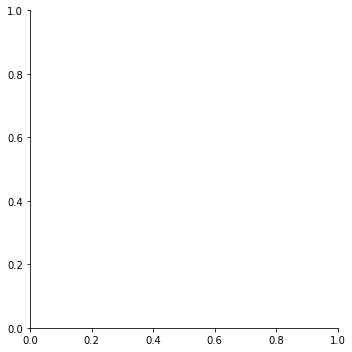

In [22]:
sns.lmplot(x='Price', y='Reviews', data=df)